In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load our image as greyscale
nadia = cv2.imread("DATA/Nadia_Murad.jpg", 0)
denis = cv2.imread("DATA/Denis_Mukwege.jpg", 0)
solvay = cv2.imread("DATA/solvay_conference.jpg", 0)

In [3]:
face_cascade = cv2.CascadeClassifier("DATA/haarcascades/haarcascade_frontalface_default.xml") # get the features of the face

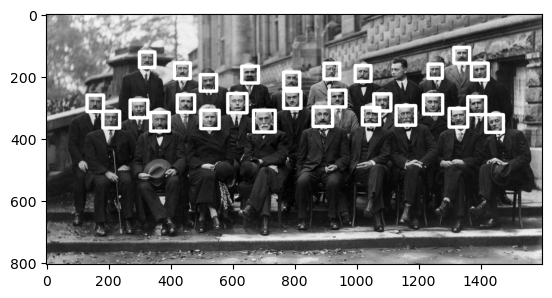

In [24]:
def detect_face(img):
    face_img = img.copy() # copy the image - keep the original safe
    
    # to solve the problem of having too many rectangles on one face, we can add a minNeighbors parameter
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.15, minNeighbors=5) # detect the face in the image, returns a list of rectangles (x,y,w,h) for the face
    
    for (x,y,w,h) in face_rects: # draw a rectangle around each face
        
        # to solve the problem of having too many rectangles on one face, we can add a minNeighbors parameter
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

result = detect_face(solvay) # solvay have many faces. For some, there are more than one rectangle
plt.imshow(result, cmap='gray')

# to solve the problem of having too many rectangles on one face, we can add a minNeighbors parameter


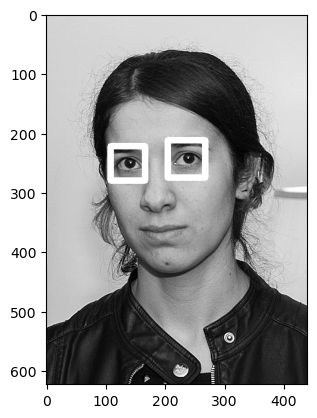

In [35]:
eye_cascade = cv2.CascadeClassifier("DATA/haarcascades/haarcascade_eye.xml") # get the features of the eyes

def detect_eyes(img):
    face_img = img.copy() # copy the image - keep the original safe
    
    # to solve the problem of having too many rectangles on one face, we can add a minNeighbors parameter
    eyes_rects = eye_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5) # detect the face in the image, returns a list of rectangles (x,y,w,h) for the face
    
    for (x,y,w,h) in eyes_rects: # draw a rectangle around each face
        
        # to solve the problem of having too many rectangles on one face, we can add a minNeighbors parameter
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

result = detect_eyes(nadia) # solvay have many faces. For some, there are more than one rectangle
plt.imshow(result, cmap='gray')

In [36]:
cap = cv2.VideoCapture(0) # capture the frame of the 0th device

while True:
    ret,frame = cap.read(0) # read the frame
    frame = detect_face(frame) # detect the face
    
    cv2.imshow("Video Face Detect", frame) # show the frame
    
    k = cv2.waitKey(1)
    if k == 27: # press esc to quit
        break

cap.release()
cv2.destroyAllWindows()